In [1]:
%%html
<img src="logo.jpg",width=60,height=60>

# Optimiser la gestion des données d'une boutique (Python)

Les datas Web et issues de l'ERP de la société Bottleneck ne sont pour l'instant pas reliées. Cela ne permet pas d'analyser le CA sur le site Web, d'effectuer certaines analyses pertinentes quant à la stratégie de l'entreprise.  

**Méthodologie pour y remédier et analyses :**  
[- 1 - Analyse et nettoyage des fichiers exportés de l'ERP et du site Web](#1---Analyse-et-nettoyage-des-fichiers-exportés-de-l'ERP-et-du-site-Web)  
[- 2 - Jointure de ces fichiers](#2---Jointure-des-dataframes)  
[- 3 - Analyse du chiffre d'affaires](#3---Analyse-du-chiffre-d'affaires)  
[- 4 - Analyse des prix de ventes](#4---Analyse-des-prix-de-vente)

---

In [2]:
# Import des librairies nécessaires
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from my_module import *

# Définition du style des graphiques
sns.set(style="darkgrid", palette="rainbow")
pd.set_option("display.float_format", lambda x: "%.2f" % x)

# Mise en someille des
import warnings

warnings.filterwarnings("ignore")

---

#### 1 - Analyse et nettoyage des fichiers exportés de l'ERP et du site Web

In [3]:
df_erp = pd.read_excel("data/erp.xlsx")
df_liaison = pd.read_excel("data/liaison.xlsx")
df_web = pd.read_excel("data/web.xlsx")

**1-1 Fichier liaison**

In [4]:
df_liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [5]:
df_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


825 entrée, 2 variables  
91 valeurs "sku" manquantes : toutes les liaisons des références produits ne sont pas effectuées entre l'ERP et le Web   
Type de variables : RAS  
Renommage de la colonne "id_web" en "sku" pour unifier les intitulés

In [6]:
# Renommage de la colonne "id_web" en "sku" du df_liaison
df_liaison.rename(columns={"id_web": "sku"}, inplace=True)

In [7]:
search_duplicates(df_liaison)

product_id: uniqueness checked, potential primary key
The variable sku is repeated 90 times


In [8]:
search_cardinality(df_liaison)

product_id
Cardinality - The variable product_id has 825 distinct values.
--------------------------------------------------------------------------------
sku
Cardinality - The variable sku has 734 distinct values.
--------------------------------------------------------------------------------


**1-2 Fichier erp**

In [9]:
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.20,0,outofstock
1,3849,1,34.30,0,outofstock
2,3850,1,20.80,0,outofstock
3,4032,1,14.10,0,outofstock
4,4039,1,46.00,0,outofstock


In [10]:
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


825 entrées (idem que df_liaison["product_id"]), 5 variables  
Type de variables : RAS

In [11]:
search_duplicates(df_erp)

product_id: uniqueness checked, potential primary key
The variable onsale_web is repeated 823 times
The variable price is repeated 444 times
The variable stock_quantity is repeated 697 times
The variable stock_status is repeated 823 times


In [12]:
search_cardinality(df_erp)

product_id
Cardinality - The variable product_id has 825 distinct values.
--------------------------------------------------------------------------------
onsale_web
[1 0]
--------------------------------------------------------------------------------
price
Cardinality - The variable price has 381 distinct values.
--------------------------------------------------------------------------------
stock_quantity
Cardinality - The variable stock_quantity has 128 distinct values.
--------------------------------------------------------------------------------
stock_status
['outofstock' 'instock']
--------------------------------------------------------------------------------


**1-3 Fichier web**

In [13]:
df_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.00,10.00,taxable,NaN,1.00,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.00,https://www.bottle-neck.fr/?post_type=product&#038;p=4954,0.00,product,NaN,0.00
1,15298,0,0,0,0.00,6.00,taxable,NaN,2.00,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.00,https://www.bottle-neck.fr/?post_type=product&#038;p=3847,0.00,product,NaN,0.00
2,15296,0,0,0,0.00,0.00,taxable,NaN,2.00,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.00,https://www.bottle-neck.fr/?post_type=product&#038;p=3849,0.00,product,NaN,0.00
3,15300,0,0,0,0.00,0.00,taxable,NaN,2.00,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coeur-2018,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.00,https://www.bottle-neck.fr/?post_type=product&#038;p=3850,0.00,product,NaN,0.00
4,19814,0,0,0,0.00,3.00,taxable,NaN,2.00,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.00,https://www.bottle-neck.fr/?post_type=product&#038;p=4032,0.00,product,NaN,0.00


In [14]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

1513 entrées, 28 variables  
Présence de variables totalements vides, à supprimer ?  
Nombreuses valeurs manquantes, notamment la variable "sku", à étudier

In [15]:
search_duplicates(df_web)

The variable sku is repeated 798 times
The variable virtual is repeated 1512 times
The variable downloadable is repeated 1512 times
The variable rating_count is repeated 1512 times
The variable average_rating is repeated 1511 times
The variable total_sales is repeated 1471 times
The variable tax_status is repeated 1511 times
The variable tax_class is repeated 1512 times
The variable post_author is repeated 1510 times
The variable post_date is repeated 796 times
The variable post_date_gmt is repeated 796 times
The variable post_content is repeated 1512 times
The variable post_title is repeated 799 times
The variable post_excerpt is repeated 833 times
The variable post_status is repeated 1511 times
The variable comment_status is repeated 1511 times
The variable ping_status is repeated 1511 times
The variable post_password is repeated 1512 times
The variable post_name is repeated 796 times
The variable post_modified is repeated 923 times
The variable post_modified_gmt is repeated 923 time

In [16]:
search_cardinality(df_web)

sku
Cardinality - The variable sku has 714 distinct values.
--------------------------------------------------------------------------------
virtual
[0]
--------------------------------------------------------------------------------
downloadable
[0]
--------------------------------------------------------------------------------
rating_count
[0]
--------------------------------------------------------------------------------
average_rating
[ 0. nan]
--------------------------------------------------------------------------------
total_sales
Cardinality - The variable total_sales has 41 distinct values.
--------------------------------------------------------------------------------
tax_status
['taxable' nan]
--------------------------------------------------------------------------------
tax_class
[nan]
--------------------------------------------------------------------------------
post_author
[ 1.  2. nan]
-----------------------------------------------------------------------------

La variable "sku" contient 714 valeurs uniques. Présence de doublons ? A vérifier.  
  

Les variables "downloadable", "rating_count" et "average_rating" ne contiennent que la valeur 0.  
Les variables "average_rating", "post_parent", "menu_order", "comment_count" ne contiennent que les valeurs 0 ou NaN.  
Création d'un dataframe "clean" sans ces variables à valeur NaN, à valeur nulle et à valeur nulle et Nan... les fonctionnalités de notation et commentaire n'étant pas utilisé sur le site Web (à confirmer).

In [17]:
# Suppresion des colonnes
df_web_clean = df_web.drop(
    columns={
        "tax_class",
        "post_content",
        "post_password",
        "post_content_filtered",
        "virtual",
        "downloadable",
        "rating_count",
        "average_rating",
        "average_rating",
        "post_parent",
        "menu_order",
        "comment_count",
    }
)

In [18]:
df_web_clean.head()

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
0,bon-cadeau-25-euros,10.00,taxable,1.00,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons peu, parlons vin.</strong>\n<strong>Parlons cadeau !</strong></span>\n\nUn bon cadeau à offrir à vos proches... sans modération !",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&#038;p=4954,product,NaN
1,15298,6.00,taxable,2.00,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre fin et de la tourbe. La bouche est une caresse grâce à des tanins élégants. De la haute couture.",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&#038;p=3847,product,NaN
2,15296,0.00,taxable,2.00,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare profondeur. L’attaque affiche de l’élégance. La bouche est portée par un minéral saisissant et des tanins de belle qualité. Grande bouteille !,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&#038;p=3849,product,NaN
3,15300,0.00,taxable,2.00,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Coeur 2018,"Dentelle de fruit de jeunes syrah, aux tanins légers et épicés. Hyper digeste. Un délice.",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coeur-2018,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&#038;p=3850,product,NaN
4,19814,3.00,taxable,2.00,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Gamine 2018,Gamine représente tout le fruité et la gourmandise de la syrah. Une touche épicée et des tanins fondus lui apportent une belle complexité.,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&#038;p=4032,product,NaN


Analyse des valeurs manquantes de la variable "sku". Création d'un sous-dataframe.

In [19]:
df_web_clean_nan = df_web_clean[df_web_clean["sku"].isna()]
df_web_clean_nan.head()

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
178,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
179,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
227,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
230,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
231,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN


In [20]:
df_web_clean_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 178 to 796
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                0 non-null      object        
 1   total_sales        2 non-null      float64       
 2   tax_status         2 non-null      object        
 3   post_author        2 non-null      float64       
 4   post_date          2 non-null      datetime64[ns]
 5   post_date_gmt      2 non-null      datetime64[ns]
 6   post_title         2 non-null      object        
 7   post_excerpt       2 non-null      object        
 8   post_status        2 non-null      object        
 9   comment_status     2 non-null      object        
 10  ping_status        2 non-null      object        
 11  post_name          2 non-null      object        
 12  post_modified      2 non-null      datetime64[ns]
 13  post_modified_gmt  2 non-null      datetime64[ns]
 14  guid     

2 références sans valeurs manquantes "totalement"

In [21]:
# Suppression des valeurs dupliquées pour voir si ce sont les mêmes 2 références
df_web_clean_nan.drop_duplicates(keep=False)

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
470,NaN,0.00,taxable,2.00,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, préserve par un élevage fin. C'est la démonstration qu'une cuvée bâtie pour la garde peut exprimer de la finesse dès sa jeunesse.",publish,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&#038;p=5070,product,NaN
471,NaN,0.00,taxable,2.00,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parfums de fruit blancs pochés et de verveine. Délicate, juste et maîtrisée, sa longueur est saisissant</span><span id=""u1194-84"">e</span>.",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&#038;p=5075,product,NaN


In [22]:

# Double vérification
df_web_clean_nan[
    (df_web_clean_nan["total_sales"].notna())
    & (df_web_clean_nan["tax_status"].notna())
    & (df_web_clean_nan["post_author"].notna())
    # ...
]

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
470,NaN,0.00,taxable,2.00,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, préserve par un élevage fin. C'est la démonstration qu'une cuvée bâtie pour la garde peut exprimer de la finesse dès sa jeunesse.",publish,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&#038;p=5070,product,NaN
471,NaN,0.00,taxable,2.00,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parfums de fruit blancs pochés et de verveine. Délicate, juste et maîtrisée, sa longueur est saisissant</span><span id=""u1194-84"">e</span>.",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&#038;p=5075,product,NaN


Les sku NaN, hormis 2 références (index 470 et 471) ont toutes leurs valeurs associées manquantes.  
Méthodologie : création d'un sku temporaire pour les 2 références non nulles et suppression des autres.

In [23]:
# sku temporaire
df_web_clean.at[470, "sku"] = "temp01"
df_web_clean.at[471, "sku"] = "temp02"

In [24]:
# Suppression des "sku" NaN
df_web_clean.dropna(subset=["sku"], inplace=True)

NumExpr defaulting to 4 threads.


In [25]:
df_web_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430 entries, 0 to 1512
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                1430 non-null   object        
 1   total_sales        1430 non-null   float64       
 2   tax_status         716 non-null    object        
 3   post_author        1430 non-null   float64       
 4   post_date          1430 non-null   datetime64[ns]
 5   post_date_gmt      1430 non-null   datetime64[ns]
 6   post_title         1430 non-null   object        
 7   post_excerpt       716 non-null    object        
 8   post_status        1430 non-null   object        
 9   comment_status     1430 non-null   object        
 10  ping_status        1430 non-null   object        
 11  post_name          1430 non-null   object        
 12  post_modified      1430 non-null   datetime64[ns]
 13  post_modified_gmt  1430 non-null   datetime64[ns]
 14  guid    

Vérification des doublons sur la variable "sku" :

In [26]:
# Tri sur la variable "post_name" pour rechercher les doublons (éventuels)
df_web_clean.sort_values("post_name").head()

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
883,16093,0.00,NaN,2.00,2018-02-13 14:48:58,2018-02-13 13:48:58,Planeta Sicilia Etna Rosso 2018,NaN,publish,closed,closed,8planeta-sicilia-etna-rosso-2018,2020-06-23 18:35:03,2020-06-23 16:35:03,https://www.bottle-neck.fr/wp-content/uploads/2020/03/8planeta-sicilia-etna-rosso-2018.jpg,attachment,image/jpeg
85,16093,0.00,taxable,2.00,2018-02-13 14:48:58,2018-02-13 13:48:58,Planeta Sicilia Etna Rosso 2018,"Etna Rosso est un vin charnu mais garde beaucoup de gourmandise. Très expressif, il exprime des arômes complexes de myrte, des sous-bois et d'épices orientales.",publish,closed,closed,8planeta-sicilia-etna-rosso-2018,2020-06-23 18:35:03,2020-06-23 16:35:03,https://www.bottle-neck.fr/?post_type=product&#038;p=4158,product,NaN
610,15325,4.00,taxable,2.00,2019-03-27 17:59:49,2019-03-27 16:59:49,Agnès Levet Côte Rôtie Améthyste 2017,"<span style=""float: none;background-color: transparent;color: #000000;font-family: 'Open Sans',Arial,Verdana,sans-serif;font-size: 15px;font-style: normal;font-variant: normal;font-weight: 400;letter-spacing: normal;list-style-type: none;text-align: center;text-decoration: none;text-indent: 0px"">C’est un vin équilibré et harmonieux issu du cœur historique de l'appellation, aux aromatiques étoffées par les saveurs épicées et appuyé par des tanins structurés et robuste.</span>\n\n&nbsp;",publish,closed,closed,agnes-levet-amethyste-2017,2020-05-21 14:00:02,2020-05-21 12:00:02,https://www.bottle-neck.fr/?post_type=product&#038;p=5826,product,NaN
1381,15325,4.00,NaN,2.00,2019-03-27 17:59:49,2019-03-27 16:59:49,Agnès Levet Côte Rôtie Améthyste 2017,NaN,publish,closed,closed,agnes-levet-amethyste-2017,2020-05-21 14:00:02,2020-05-21 12:00:02,https://www.bottle-neck.fr/wp-content/uploads/2020/03/agnes-levet-amethyste-2017.jpg,attachment,image/jpeg
611,15328,3.00,taxable,2.00,2019-03-27 18:05:09,2019-03-27 17:05:09,Agnès Levet Côte Rôtie Maestria 2017,"<span style=""float: none; background-color: transparent; color: #000000; font-family: 'Open Sans',Arial,Verdana,sans-serif; font-size: 15px; font-style: normal; font-variant: normal; font-weight: 400; letter-spacing: normal; list-style-type: none; text-align: center; text-decoration: none; text-indent: 0px;"">C’est un vin élégant et délicat caractéristique du lieu-dit La Landonne, aux arômes fruités complété par des notes florales de violette et soutenu par le velours des tanins très fins et fermes.</span>\n\n&nbsp;",publish,closed,closed,agnes-levet-cote-rotie-maestria-2017,2020-07-25 15:45:02,2020-07-25 13:45:02,https://www.bottle-neck.fr/?post_type=product&#038;p=5827,product,NaN


In [27]:
df_web_clean["post_type"].unique()

array(['product', 'attachment'], dtype=object)

L'ensemble des références sont doublées, une ligne correspondant au produit, l'autre au fichier image associé au produit.  
La colonne "post_type" permet de faire cette distinction. Il est raisonnable de ne garder que la valeur "product" plus informative (cf. "post_excerpt" et "guid").  
Le lien Web de l'image du produit et le "post_mime_type" sont les 2 informations perdues dans l'opération.

In [28]:
df_web_clean = df_web_clean[df_web_clean["post_type"] == "product"]
df_web_clean.drop(columns={"post_mime_type"}, inplace=True)
df_web_clean.head()

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,bon-cadeau-25-euros,10.00,taxable,1.00,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons peu, parlons vin.</strong>\n<strong>Parlons cadeau !</strong></span>\n\nUn bon cadeau à offrir à vos proches... sans modération !",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&#038;p=4954,product
1,15298,6.00,taxable,2.00,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre fin et de la tourbe. La bouche est une caresse grâce à des tanins élégants. De la haute couture.",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&#038;p=3847,product
2,15296,0.00,taxable,2.00,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare profondeur. L’attaque affiche de l’élégance. La bouche est portée par un minéral saisissant et des tanins de belle qualité. Grande bouteille !,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&#038;p=3849,product
3,15300,0.00,taxable,2.00,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Coeur 2018,"Dentelle de fruit de jeunes syrah, aux tanins légers et épicés. Hyper digeste. Un délice.",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coeur-2018,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&#038;p=3850,product
4,19814,3.00,taxable,2.00,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Gamine 2018,Gamine représente tout le fruité et la gourmandise de la syrah. Une touche épicée et des tanins fondus lui apportent une belle complexité.,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&#038;p=4032,product


In [29]:
df_web_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 798
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                716 non-null    object        
 1   total_sales        716 non-null    float64       
 2   tax_status         716 non-null    object        
 3   post_author        716 non-null    float64       
 4   post_date          716 non-null    datetime64[ns]
 5   post_date_gmt      716 non-null    datetime64[ns]
 6   post_title         716 non-null    object        
 7   post_excerpt       716 non-null    object        
 8   post_status        716 non-null    object        
 9   comment_status     716 non-null    object        
 10  ping_status        716 non-null    object        
 11  post_name          716 non-null    object        
 12  post_modified      716 non-null    datetime64[ns]
 13  post_modified_gmt  716 non-null    datetime64[ns]
 14  guid      

La variable "guid" nous permet de "deviner" le "product_id". En effet, la portion "p=XXXX" à la fin du lien Web enregistré dans la variable "guid" semble correspondre au "product_id".

In [30]:
# Extraction de "p=xxxx" de la variable "guid" et création de "product_id2"
df_web_clean["product_id2"] = df_web_clean["guid"].str.split(";p=", expand=True)[1]

In [31]:
df_web_clean.head()

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,product_id2
0,bon-cadeau-25-euros,10.00,taxable,1.00,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons peu, parlons vin.</strong>\n<strong>Parlons cadeau !</strong></span>\n\nUn bon cadeau à offrir à vos proches... sans modération !",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&#038;p=4954,product,4954
1,15298,6.00,taxable,2.00,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre fin et de la tourbe. La bouche est une caresse grâce à des tanins élégants. De la haute couture.",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&#038;p=3847,product,3847
2,15296,0.00,taxable,2.00,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare profondeur. L’attaque affiche de l’élégance. La bouche est portée par un minéral saisissant et des tanins de belle qualité. Grande bouteille !,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&#038;p=3849,product,3849
3,15300,0.00,taxable,2.00,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Coeur 2018,"Dentelle de fruit de jeunes syrah, aux tanins légers et épicés. Hyper digeste. Un délice.",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coeur-2018,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&#038;p=3850,product,3850
4,19814,3.00,taxable,2.00,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Gamine 2018,Gamine représente tout le fruité et la gourmandise de la syrah. Une touche épicée et des tanins fondus lui apportent une belle complexité.,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&#038;p=4032,product,4032


In [32]:
# Jointure avec df_liaison sur la variable "sku"
df_temp = df_web_clean.merge(df_liaison, on="sku")

In [33]:
# Uniformisation des formats des 2 variables
df_temp["product_id2"] = pd.to_numeric(df_temp["product_id2"], downcast="integer")
df_temp["product_id"] = pd.to_numeric(df_temp["product_id"], downcast="integer")

In [34]:
# Vérification de l'égalité des 2 variables
df_temp["product_id"].equals(df_temp["product_id2"])

True

**Intuition confirmée, le "p=xxxx" de la variable "guid" correspond au "product_id".  
Afin de garder les 2 références sans sku dans df_web_clean, il est plus judicieux de faire directement la jointure des tables web et erp sur l'"id_product2" (df_web/déduit de la variable "guid") et l'"id_product" (df_erp) sans utiliser df_liaison.**  
Une autre solution, plus lourde (et inutile !?), aurait été de mettre à jour df_liaison et faire la jointure des 3 dataframes.

---

#### 2 - Jointure des dataframes

**2-1 Jointure "outer"**

Il s'agit de vérifier la jointure des 2 dataframes sans exclusion de données.

In [35]:
# MAJ du type de la variable "product_id2"
df_web_clean["product_id2"] = pd.to_numeric(df_web_clean["product_id2"])

# Jointure avec l'indicator (type de jointure)
df = df_web_clean.merge(
    df_erp, how="outer", left_on="product_id2", right_on="product_id", indicator=True
)
df.head()

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,...,post_modified_gmt,guid,post_type,product_id2,product_id,onsale_web,price,stock_quantity,stock_status,_merge
0,bon-cadeau-25-euros,10.00,taxable,1.00,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons peu, parlons vin.</strong>\n<strong>Parlons cadeau !</strong></span>\n\nUn bon cadeau à offrir à vos proches... sans modération !",publish,closed,...,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&#038;p=4954,product,4954.00,4954,1,25.00,0,instock,both
1,15298,6.00,taxable,2.00,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre fin et de la tourbe. La bouche est une caresse grâce à des tanins élégants. De la haute couture.",publish,closed,...,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&#038;p=3847,product,3847.00,3847,1,24.20,0,outofstock,both
2,15296,0.00,taxable,2.00,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare profondeur. L’attaque affiche de l’élégance. La bouche est portée par un minéral saisissant et des tanins de belle qualité. Grande bouteille !,publish,closed,...,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&#038;p=3849,product,3849.00,3849,1,34.30,0,outofstock,both
3,15300,0.00,taxable,2.00,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Coeur 2018,"Dentelle de fruit de jeunes syrah, aux tanins légers et épicés. Hyper digeste. Un délice.",publish,closed,...,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&#038;p=3850,product,3850.00,3850,1,20.80,0,outofstock,both
4,19814,3.00,taxable,2.00,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Gamine 2018,Gamine représente tout le fruité et la gourmandise de la syrah. Une touche épicée et des tanins fondus lui apportent une belle complexité.,publish,closed,...,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&#038;p=4032,product,4032.00,4032,1,14.10,0,outofstock,both


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                716 non-null    object        
 1   total_sales        716 non-null    float64       
 2   tax_status         716 non-null    object        
 3   post_author        716 non-null    float64       
 4   post_date          716 non-null    datetime64[ns]
 5   post_date_gmt      716 non-null    datetime64[ns]
 6   post_title         716 non-null    object        
 7   post_excerpt       716 non-null    object        
 8   post_status        716 non-null    object        
 9   comment_status     716 non-null    object        
 10  ping_status        716 non-null    object        
 11  post_name          716 non-null    object        
 12  post_modified      716 non-null    datetime64[ns]
 13  post_modified_gmt  716 non-null    datetime64[ns]
 14  guid      

In [37]:
# Vérification du type de jointure
df["_merge"].unique()

['both', 'right_only']
Categories (2, object): ['both', 'right_only']

In [38]:
# Vérification des jointures non communes
df_not_both = df[df["_merge"] == "right_only"]
df_not_both.head()

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,...,post_modified_gmt,guid,post_type,product_id2,product_id,onsale_web,price,stock_quantity,stock_status,_merge
716,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,4055,0,86.10,0,outofstock,right_only
717,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,4090,0,73.00,0,outofstock,right_only
718,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,4092,0,47.00,0,outofstock,right_only
719,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,4195,0,14.10,0,outofstock,right_only
720,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,NaN,4209,0,73.50,0,outofstock,right_only


In [39]:
df_not_both.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 716 to 824
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                0 non-null      object        
 1   total_sales        0 non-null      float64       
 2   tax_status         0 non-null      object        
 3   post_author        0 non-null      float64       
 4   post_date          0 non-null      datetime64[ns]
 5   post_date_gmt      0 non-null      datetime64[ns]
 6   post_title         0 non-null      object        
 7   post_excerpt       0 non-null      object        
 8   post_status        0 non-null      object        
 9   comment_status     0 non-null      object        
 10  ping_status        0 non-null      object        
 11  post_name          0 non-null      object        
 12  post_modified      0 non-null      datetime64[ns]
 13  post_modified_gmt  0 non-null      datetime64[ns]
 14  guid    

109 références présentes dans l'erp mais non vendues sur le site Web.

**2-2 Jointure "left"**

L'analyse ne devant être effectuée que sur les ventes online, seules les données Web sont à conserver lors de la jointure.

In [40]:
df = df_web_clean.merge(
    df_erp, how="left", left_on="product_id2", right_on="product_id"
)

In [41]:
df.head()

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,...,post_modified,post_modified_gmt,guid,post_type,product_id2,product_id,onsale_web,price,stock_quantity,stock_status
0,bon-cadeau-25-euros,10.00,taxable,1.00,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons peu, parlons vin.</strong>\n<strong>Parlons cadeau !</strong></span>\n\nUn bon cadeau à offrir à vos proches... sans modération !",publish,closed,...,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&#038;p=4954,product,4954,4954,1,25.00,0,instock
1,15298,6.00,taxable,2.00,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre fin et de la tourbe. La bouche est une caresse grâce à des tanins élégants. De la haute couture.",publish,closed,...,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&#038;p=3847,product,3847,3847,1,24.20,0,outofstock
2,15296,0.00,taxable,2.00,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare profondeur. L’attaque affiche de l’élégance. La bouche est portée par un minéral saisissant et des tanins de belle qualité. Grande bouteille !,publish,closed,...,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&#038;p=3849,product,3849,3849,1,34.30,0,outofstock
3,15300,0.00,taxable,2.00,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Coeur 2018,"Dentelle de fruit de jeunes syrah, aux tanins légers et épicés. Hyper digeste. Un délice.",publish,closed,...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&#038;p=3850,product,3850,3850,1,20.80,0,outofstock
4,19814,3.00,taxable,2.00,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Gamine 2018,Gamine représente tout le fruité et la gourmandise de la syrah. Une touche épicée et des tanins fondus lui apportent une belle complexité.,publish,closed,...,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&#038;p=4032,product,4032,4032,1,14.10,0,outofstock


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 715
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                716 non-null    object        
 1   total_sales        716 non-null    float64       
 2   tax_status         716 non-null    object        
 3   post_author        716 non-null    float64       
 4   post_date          716 non-null    datetime64[ns]
 5   post_date_gmt      716 non-null    datetime64[ns]
 6   post_title         716 non-null    object        
 7   post_excerpt       716 non-null    object        
 8   post_status        716 non-null    object        
 9   comment_status     716 non-null    object        
 10  ping_status        716 non-null    object        
 11  post_name          716 non-null    object        
 12  post_modified      716 non-null    datetime64[ns]
 13  post_modified_gmt  716 non-null    datetime64[ns]
 14  guid      

Les 716 entrées de df_web sont bien conservées. Pas d'information perdue.

---

#### 3 - Analyse du chiffre d'affaires

In [43]:
# Crétion d'un dataframe "allégé" pour analyser le chiffre d'affaires
col = ["sku", "product_id", "post_title", "total_sales", "price"]
df_CA = df[col]
df_CA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 715
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          716 non-null    object 
 1   product_id   716 non-null    int64  
 2   post_title   716 non-null    object 
 3   total_sales  716 non-null    float64
 4   price        716 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 33.6+ KB


Calcul du chiffre d'affaires par référence :

In [44]:
# CA par référence
df_CA["CA"] = df_CA["total_sales"] * df_CA["price"]
df_CA.sort_values("CA", ascending=False)

,sku,product_id,post_title,total_sales,price,CA
195,7818,4334,Champagne Gosset Grand Blanc de Blancs,96.00,49.00,4704.00
72,1662,4144,Champagne Gosset Grand Rosé,87.00,49.00,4263.00
219,3510,4402,Cognac Frapin VIP XO,13.00,176.00,2288.00
71,11641,4142,Champagne Gosset Grand Millésime 2006,30.00,53.00,1590.00
70,304,4141,Champagne Gosset Grande Réserve,40.00,39.00,1560.00
...,...,...,...,...,...,...
352,15732,4790,Maurice Schoech Riesling 2018,0.00,11.10,0.00
349,15881,4786,Maurice Schoech Gewurztraminer 2018,0.00,12.10,0.00
347,15734,4784,Maurice Schoech Riesling Vendanges Tardives 2017,0.00,28.50,0.00
346,13754,4783,Maurice Schoech Pinot Gris Vendanges Tardives 2015,0.00,29.50,0.00


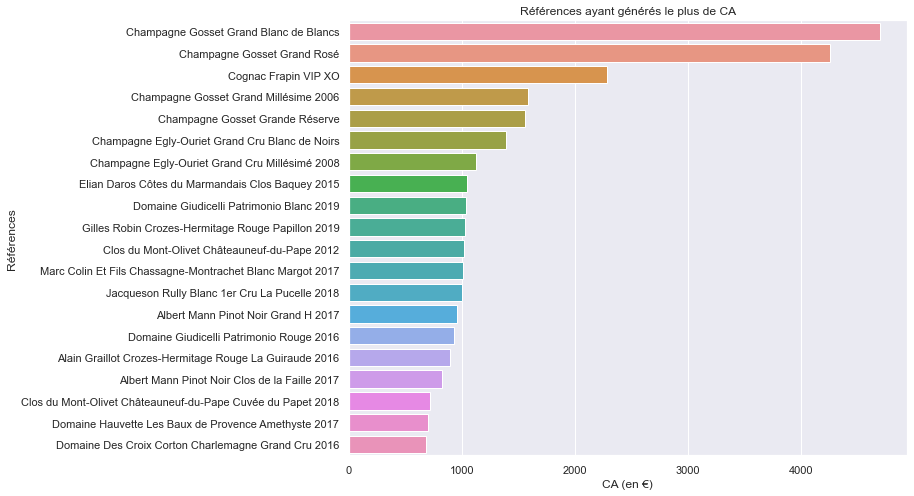

In [45]:
# Les 20 références générant le plus de chiffre d'affaires
df_CA_20 = df_CA.sort_values("CA", ascending=False)[:20]
plt.figure(figsize=(10, 8))
sns.barplot(x="CA", y="post_title", data=df_CA_20)
plt.title("Références ayant générés le plus de CA")
plt.ylabel("Références")
plt.xlabel("CA (en €)")
plt.show();

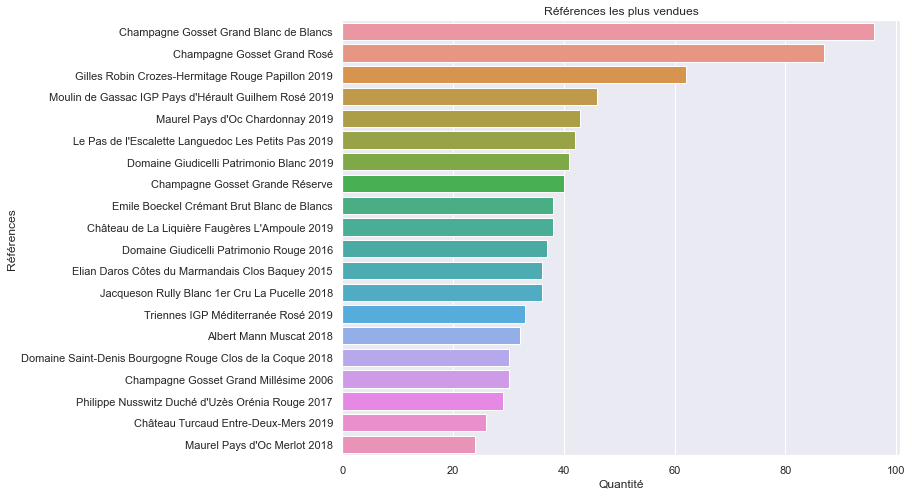

In [46]:
# Les 20 références les plus vendues
df_nb_vente_20 = df_CA.sort_values("total_sales", ascending=False)[:20]
plt.figure(figsize=(10, 8))
sns.barplot(x="total_sales", y="post_title", data=df_nb_vente_20)
plt.title("Références les plus vendues")
plt.ylabel("Références")
plt.xlabel("Quantité")
plt.show();

In [47]:
# Liste des produits invendus
df_no_sale = df_CA[df_CA["total_sales"] == 0]
df_no_sale.head()

,sku,product_id,post_title,total_sales,price,CA
2,15296,3849,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,0.00,34.30,0.00
3,15300,3850,Pierre Jean Villa Crozes-Hermitage Accroche Coeur 2018,0.00,20.80,0.00
5,19815,4039,Pierre Jean Villa Côte Rôtie Carmina 2017,0.00,46.00,0.00
6,15303,4040,Pierre Jean Villa Saint-Joseph Saut De l'Ange 2018,0.00,34.30,0.00
7,14975,4041,Pierre Gaillard Condrieu 2018,0.00,32.70,0.00


In [48]:
df_no_sale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 2 to 715
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          331 non-null    object 
 1   product_id   331 non-null    int64  
 2   post_title   331 non-null    object 
 3   total_sales  331 non-null    float64
 4   price        331 non-null    float64
 5   CA           331 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 18.1+ KB


331 références n'ont pas été vendues.

**Calcul du chiffre d'affaires total :**

In [49]:
CA_total = df_CA["CA"].sum()
print(f"Le chiffre d'affaires totale est de {CA_total:.2f} €")

Le chiffre d'affaires totale est de 70568.60 €


---

#### 4 - Analyse des prix de vente

**4-1 Sur les références vendues sur le Web**

In [50]:
df["price"].describe()

count   716.00
mean     32.58
std      27.84
min       5.20
25%      14.10
50%      23.65
75%      42.30
max     225.00
Name: price, dtype: float64

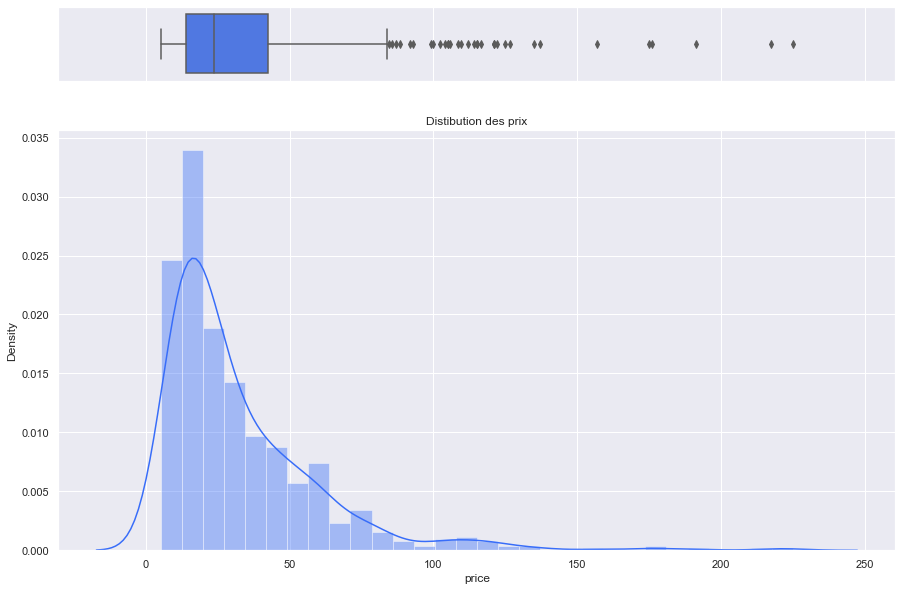

In [51]:
# Analyse de la distribution du prix
f, (ax_box, ax_hist) = plt.subplots(
    2, sharex=True, gridspec_kw={"height_ratios": (0.15, 0.85)}
)
f.set_figheight(10)
f.set_figwidth(15)
plt.title("Distibution des prix")
sns.boxplot(df["price"], ax=ax_box)
sns.distplot(a=df["price"], hist=True, kde=True, bins=30, ax=ax_hist)
ax_box.set(xlabel="")
plt.show();

In [66]:
# Test de Shapiro (loi normale) - juste pour essayer !
# p <= alpha: reject H0, not normal.
# p > alpha: fail to reject H0, normal.

from scipy.stats import shapiro
stat, p = shapiro(df["price"])
print(f"Test-Statistic = {stat:.3f} , p-value = {p:.3f}")

Test-Statistic = 0.762 , p-value = 0.000


Prix minimum : 5,20 €  
Prix maximum : 225 €   
Les outliers sont atypiques mais non aberrants pour ce type de produit.  
Comparaison de la référence la plus chère avec un concurrent (Vivino) : <a href="https://www.vivino.com/FR/fr/egly-ouriet-millesime-brut-champagne-grand-cru-ambonnay/w/2213776?year=2008">Champagne Egly-Ouriet Grand Cru Millésimé 2008</a>

**Méthode 1 :** sans supprimer les outliers, pour affiner les analyses futures, il serait judicieux de classer nos références par intervalle de prix

In [53]:
# Discrétisation du prix selon les quartiles
df_CA["class_price"] = pd.qcut(df_CA["price"], 4)

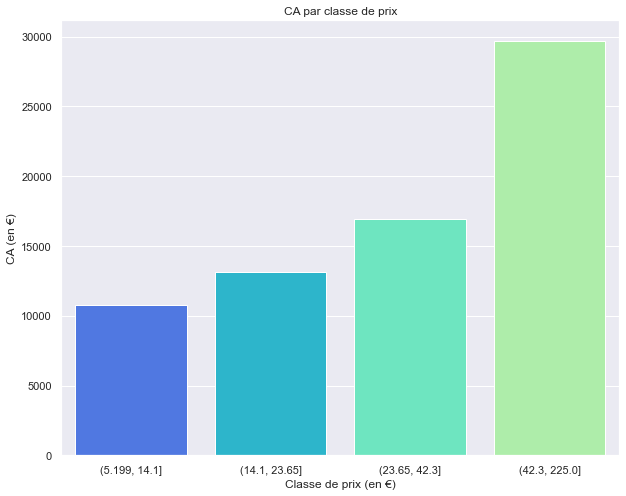

In [54]:
# CA par classe de prix
df_temp_CA = df_CA.groupby("class_price").sum().reset_index()
plt.figure(figsize=(10, 8))
sns.barplot(x="class_price", y="CA", data=df_temp_CA)
plt.title("CA par classe de prix")
plt.ylabel("CA (en €)")
plt.xlabel("Classe de prix (en €)")
plt.show();

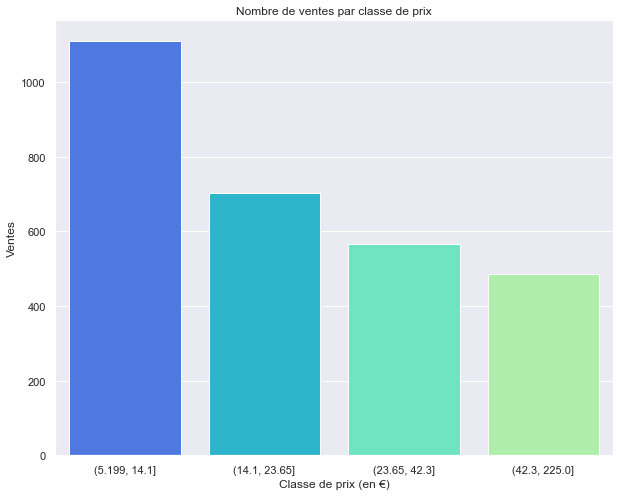

In [55]:
# Nombre de ventes par classe de prix
df_temp_vente = df_CA.groupby("class_price").sum().reset_index()
plt.figure(figsize=(10, 8))
sns.barplot(x="class_price", y="total_sales", data=df_temp_vente)
plt.title("Nombre de ventes par classe de prix")
plt.ylabel("Ventes")
plt.xlabel("Classe de prix (en €)")
plt.show();

**Méthode 2 :** Suppression des outliers selon la méthode interquartile

In [56]:
# Fonction drop_ouliers
df_no_outlier = drop_outliers(df, "price")

In [57]:
df_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 715
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                683 non-null    object        
 1   total_sales        683 non-null    float64       
 2   tax_status         683 non-null    object        
 3   post_author        683 non-null    float64       
 4   post_date          683 non-null    datetime64[ns]
 5   post_date_gmt      683 non-null    datetime64[ns]
 6   post_title         683 non-null    object        
 7   post_excerpt       683 non-null    object        
 8   post_status        683 non-null    object        
 9   comment_status     683 non-null    object        
 10  ping_status        683 non-null    object        
 11  post_name          683 non-null    object        
 12  post_modified      683 non-null    datetime64[ns]
 13  post_modified_gmt  683 non-null    datetime64[ns]
 14  guid      

In [58]:
ratio_outlier = 100 - (df_no_outlier["sku"].size * 100 / df["sku"].size)
q1 = df_CA["price"].quantile(0.25)
q3 = df_CA["price"].quantile(0.75)
IRQ = (q3 - q1)
max_outlier = q3 + 1.5 * IRQ
CA_outlier = df_CA[df_CA["price"] > max_outlier]["CA"].sum()
ratio_CA_outlier = CA_outlier * 100 / CA_total

print(f"La proportion d'outliers est de {ratio_outlier:.2f} %")
print(
    f"Sont considérés comme outliers, toutes les références d'un montant supérieur à {max_outlier:.2f} €"
)
print(
    f"Le CA des outliers est de {CA_outlier:.2f} €, soit {ratio_CA_outlier:.2f} % du CA total"
)

La proportion d'outliers est de 4.61 %
Sont considérés comme outliers, toutes les références d'un montant supérieur à 84.60 €
Le CA des outliers est de 6970.00 €, soit 9.88 % du CA total


In [59]:
nb_vente_outlier = df[df["price"] > max_outlier]["total_sales"].sum()
nb_vente_total = df["total_sales"].sum()
ratio_nb_vente_outlier = nb_vente_outlier * 100 / nb_vente_total

print(f"{nb_vente_outlier:.0f} ventes considérées comme outliers,")
print(f"soit {ratio_nb_vente_outlier:.2f} % du nombre de ventes totales.")


45 ventes considérées comme outliers,
soit 1.57 % du nombre de ventes totales.


**Le chiffre d'affaires des outliers représente presque 10% du chiffre d'affaires total. Il est donc raisonnable de les conserver dans notre analyse et de privilégier la méthode 1.**

**4-2 Sur tout le catalogue**

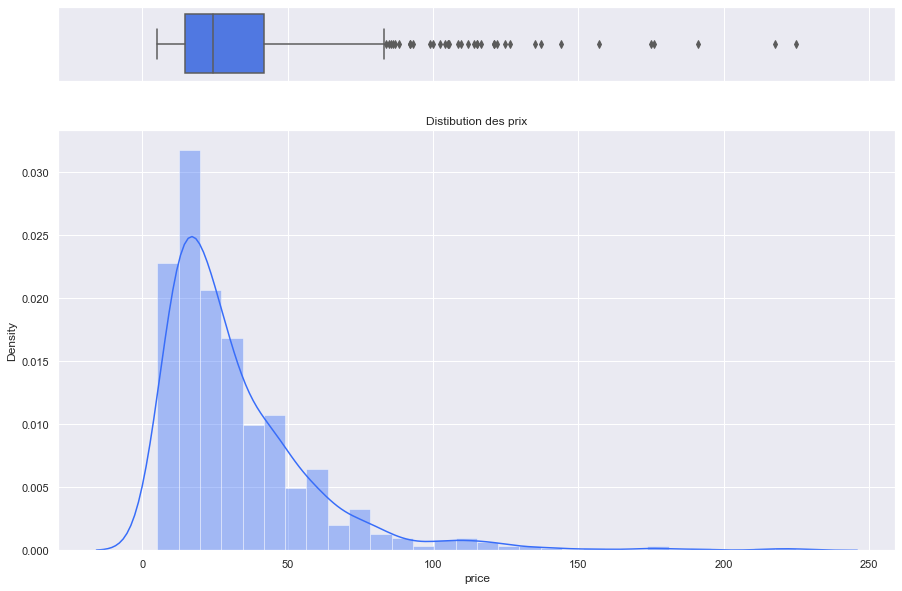

In [60]:
# Analyse de la distribution du prix
f, (ax_box, ax_hist) = plt.subplots(
    2, sharex=True, gridspec_kw={"height_ratios": (0.15, 0.85)}
)
f.set_figheight(10)
f.set_figwidth(15)
plt.title("Distibution des prix")
sns.boxplot(df_erp["price"], ax=ax_box)
sns.distplot(a=df_erp["price"], hist=True, kde=True, bins=30, ax=ax_hist)
ax_box.set(xlabel="")
plt.show();

In [61]:
df_no_outlier2 = drop_outliers(df_erp, "price")

In [62]:
df_no_outlier2.describe()

,product_id,onsale_web,price,stock_quantity
count,788.00,788.00,788.00,788.00
mean,5158.56,0.87,28.26,27.40
std,908.59,0.34,17.52,46.75
min,3847.00,0.00,5.20,0.00
25%,4303.75,1.00,14.28,1.00
50%,4896.00,1.00,23.40,12.00
75%,5801.25,1.00,39.00,35.00
max,7338.00,1.00,83.00,578.00


In [63]:
df_no_outlier.describe()

,total_sales,post_author,product_id2,product_id,onsale_web,price,stock_quantity
count,683.00,683.00,683.00,683.00,683.00,683.00,683.00
mean,4.13,2.00,5021.59,5021.59,1.00,28.19,29.71
std,8.67,0.04,789.86,789.86,0.00,18.26,48.86
min,0.00,1.00,3847.00,3847.00,1.00,5.20,0.00
25%,0.00,2.00,4271.50,4271.50,1.00,13.70,2.00
50%,1.00,2.00,4790.00,4790.00,1.00,22.80,13.00
75%,5.00,2.00,5703.50,5703.50,1.00,39.00,36.00
max,96.00,2.00,7338.00,7338.00,1.00,83.70,578.00


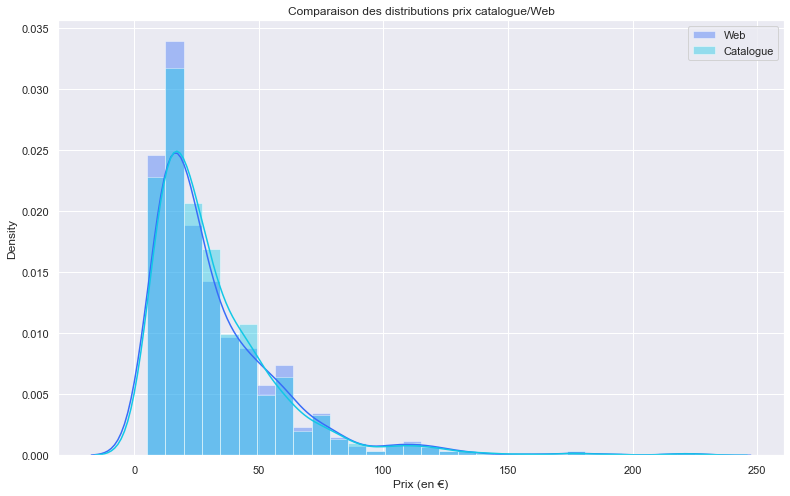

In [64]:
plt.figure(figsize=(13, 8))
sns.distplot(a=df["price"], hist=True, kde=True, bins=30, label="Web")
sns.distplot(a=df_erp["price"], hist=True, kde=True, bins=30, label="Catalogue")
plt.title("Comparaison des distributions prix catalogue/Web")
plt.xlabel("Prix (en €)")
plt.legend()
plt.show()

**Distributions des prix similaires, très peu de différences dans les mesures de tendance centrale et de dispersion au niveau du prix. La méthode 1 est également à privilégier pour l'analyse de tout le catalogue.**